In [20]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [21]:
import pandas as pd 

df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

In [22]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [24]:
df[['casual', 'cnt']].corr()

,casual,cnt
casual,1.000000,0.672804
cnt,0.672804,1.000000


In [25]:
df_model = df.drop(columns=['casual', 'registered', 'instant', 'yr', 'mnth', 'dteday'])
df_model


,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...
726,1,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


## Obtener variables dummy

In [26]:
df_model_encoded = pd.get_dummies(df_model, columns=['season', 'weekday', 'weathersit'])
df_model_encoded.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,False,...,True,False,False,False,False,False,False,False,True,False
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,True,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,True,False,False,...,False,False,True,False,False,False,False,True,False,False
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,True,False,False,...,False,False,False,True,False,False,False,True,False,False


In [27]:
# Gráfica para análisis Bivariado
def graficar_bivariado(grouped_data_x, grouped_data_y):
    plt.figure(figsize=(8,6))
    plt.plot(grouped_data_x, grouped_data_y, marker='o', color='cadetblue')
    plt.title(f'Análisis bivariado {grouped_data_x.name}')
    plt.ylabel('Median House Value')
    plt.xlabel(grouped_data_x.name)
    plt.grid(alpha=0.5)

In [28]:
variables = df_model_encoded.columns.tolist()
variables

['holiday',
 'workingday',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'cnt',
 'season_1',
 'season_2',
 'season_3',
 'season_4',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'weathersit_1',
 'weathersit_2',
 'weathersit_3']

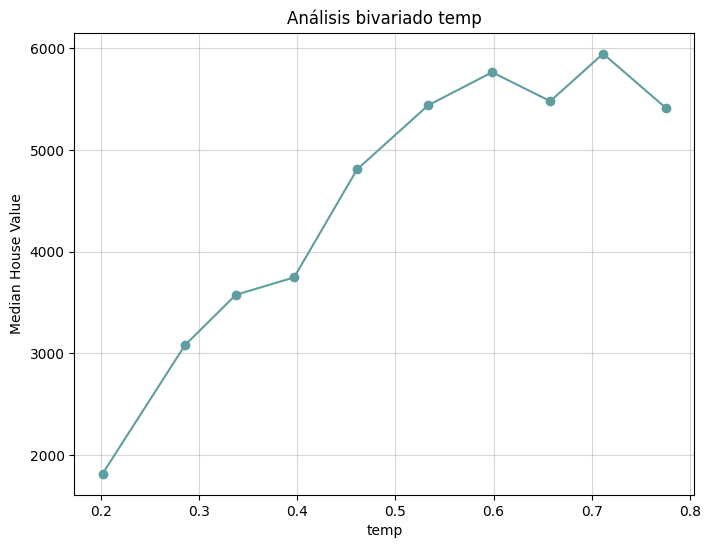

In [29]:
df_model_encoded['x_bins'] = pd.qcut(df_model_encoded['temp'], q=10, labels=False) + 1
grouped_data = df_model_encoded.groupby('x_bins')[['temp', 'cnt']].mean()
graficar_bivariado(grouped_data['temp'], grouped_data['cnt'])

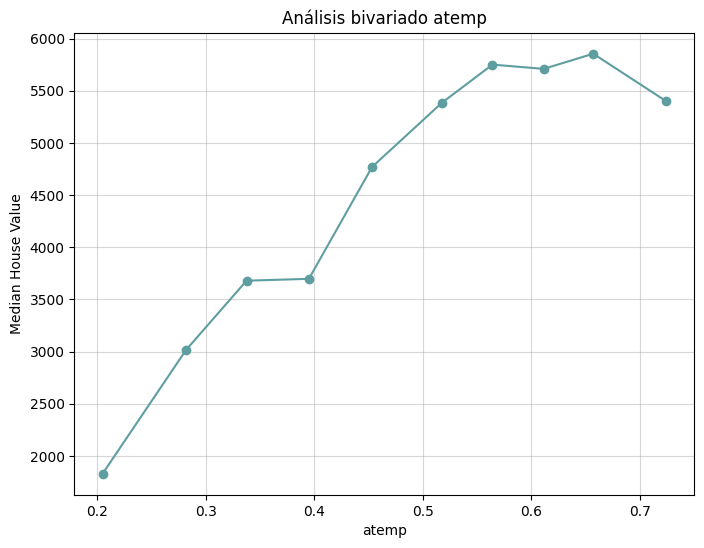

In [30]:
df_model_encoded['x_bins'] = pd.qcut(df_model_encoded['atemp'], q=10, labels=False) + 1
grouped_data = df_model_encoded.groupby('x_bins')[['atemp', 'cnt']].mean()
graficar_bivariado(grouped_data['atemp'], grouped_data['cnt'])

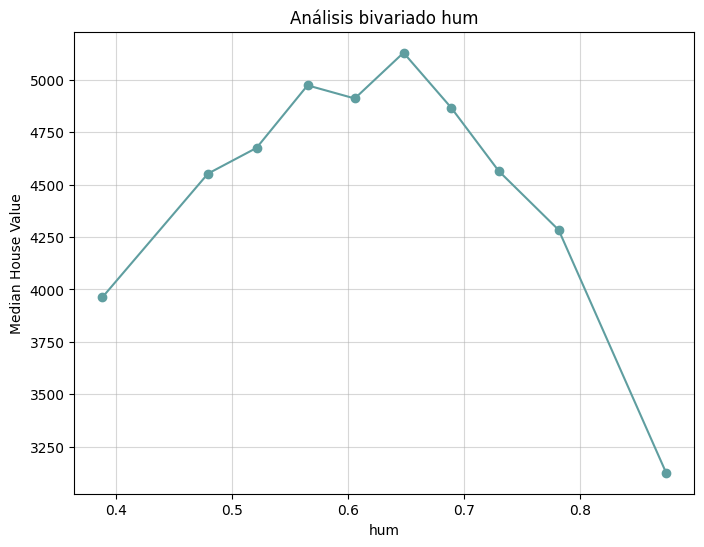

In [31]:
df_model_encoded['x_bins'] = pd.qcut(df_model_encoded['hum'], q=10, labels=False) + 1
grouped_data = df_model_encoded.groupby('x_bins')[['hum', 'cnt']].mean()
graficar_bivariado(grouped_data['hum'], grouped_data['cnt'])

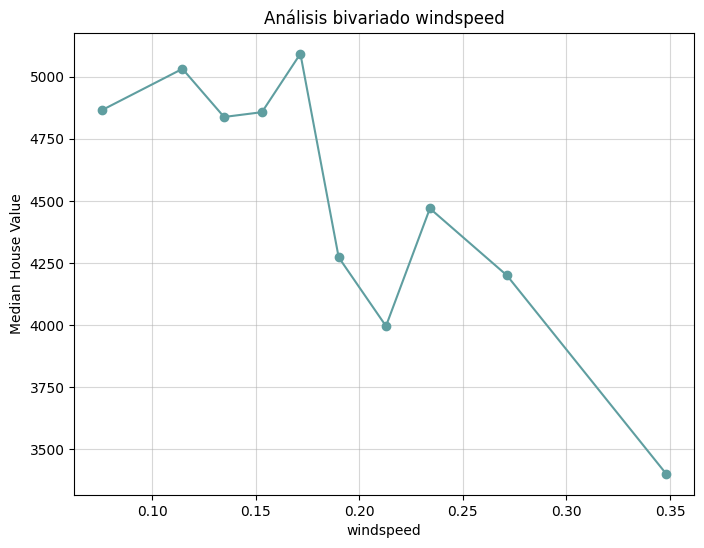

In [32]:
df_model_encoded['x_bins'] = pd.qcut(df_model_encoded['windspeed'], q=10, labels=False) + 1
grouped_data = df_model_encoded.groupby('x_bins')[['windspeed', 'cnt']].mean()
graficar_bivariado(grouped_data['windspeed'], grouped_data['cnt'])

In [33]:
df_model_encoded.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,x_bins
0,0,0,0.344167,0.363625,0.805833,0.160446,985,True,False,False,...,False,False,False,False,False,True,False,True,False,4
1,0,0,0.363478,0.353739,0.696087,0.248539,801,True,False,False,...,False,False,False,False,False,False,False,True,False,9
2,0,1,0.196364,0.189405,0.437273,0.248309,1349,True,False,False,...,True,False,False,False,False,False,True,False,False,8
3,0,1,0.200000,0.212122,0.590435,0.160296,1562,True,False,False,...,False,True,False,False,False,False,True,False,False,4
4,0,1,0.226957,0.229270,0.436957,0.186900,1600,True,False,False,...,False,False,True,False,False,False,True,False,False,6


In [34]:
df_model_encoded['hum'] = df['hum']**2
df_model_encoded['temp'] = df['temp']**2
df_model_encoded['atemp'] = df['atemp']**2
df_model_encoded.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_1,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,x_bins
0,0,0,0.118451,0.132223,0.649367,0.160446,985,True,False,False,...,False,False,False,False,False,True,False,True,False,4
1,0,0,0.132116,0.125131,0.484537,0.248539,801,True,False,False,...,False,False,False,False,False,False,False,True,False,9
2,0,1,0.038559,0.035874,0.191208,0.248309,1349,True,False,False,...,True,False,False,False,False,False,True,False,False,8
3,0,1,0.040000,0.044996,0.348613,0.160296,1562,True,False,False,...,False,True,False,False,False,False,True,False,False,4
4,0,1,0.051509,0.052565,0.190931,0.186900,1600,True,False,False,...,False,False,True,False,False,False,True,False,False,6


In [35]:
del df_model_encoded['x_bins']

In [37]:
del df_model_encoded['cnt']

In [40]:
X = df_model_encoded
target = 'cnt'
y = df[target]

model = linear_model.LinearRegression().fit(X, y)
r2 = r2_score(y_true=y, y_pred=model.predict(X))
r2

0.5254631464976787